# Lifeline Adoption over time

Making a graph to show how Lifeline's adoption rate has changed over time, specifically to demonstrate that ACP did not have a significant impact on Lifeline's adoption rate. 

Using data from USAC Open data:
https://opendata.usac.org/Lifeline/Lifeline-Disbursements-Tool/rink-mije

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ll = pd.read_csv('/Users/mhamburger94/Downloads/Lifeline_Disbursements_20240923.csv')
ll.shape

(400763, 17)

In [3]:
ll.head()

,State,Study Area Code,Study Area Name,Disbursement Year,Disbursement Month,Disbursement Month Date Format,Support Year,Support Month,Support Month Date Format,Support Type,Provider Type,Technology Type,Service Type,Submission Type,Disbursement Type,Subscriber Count,Disbursement Amount
0,OK,431980,CHICKASAW TELEPHONE CO.,2019,1,01/01/2019,2018,12,12/01/2018,NaN,ILEC,WIRELINE,NaN,CLAIM,LINKUP,0,92
1,OK,431980,CHICKASAW TELEPHONE CO.,2019,3,03/01/2019,2019,2,02/01/2019,NaN,ILEC,WIRELINE,NaN,CLAIM,LINKUP,0,176
2,ND,381447,NORTH DAKOTA TELEPHONE COMPANY,2018,3,03/01/2018,2018,2,02/01/2018,NaN,ILEC,WIRELINE,NaN,CLAIM,LINKUP,0,38
3,ND,381447,NORTH DAKOTA TELEPHONE COMPANY,2018,6,06/01/2018,2018,5,05/01/2018,NaN,ILEC,WIRELINE,NaN,CLAIM,LINKUP,0,114
4,ND,381447,NORTH DAKOTA TELEPHONE COMPANY,2018,9,09/01/2018,2018,8,08/01/2018,NaN,ILEC,WIRELINE,NaN,CLAIM,LINKUP,0,38


In [36]:
ll_year = ll.groupby('Support Year').agg({
    'Subscriber Count': 'sum',
    'Disbursement Amount': 'sum'
}).reset_index().sort_values(by=['Support Year'])

ll_year

,Support Year,Subscriber Count,Disbursement Amount
0,2000,0,-75
1,2001,0,-300
2,2002,0,-300
3,2003,0,-300
4,2004,0,-300
5,2005,0,-300
6,2006,0,-300
7,2007,0,-300
8,2008,0,-571
9,2009,0,-300


In [37]:
df = ll_year[ll_year['Support Year'] >=2018]

df

,Support Year,Subscriber Count,Disbursement Amount
18,2018,115197581,1138540892
19,2019,95506103,947590238
20,2020,88529622,869516887
21,2021,78497804,762926603
22,2022,76411329,745587225
23,2023,81942816,803824838
24,2024,53481131,531255213


<BarContainer object of 7 artists>

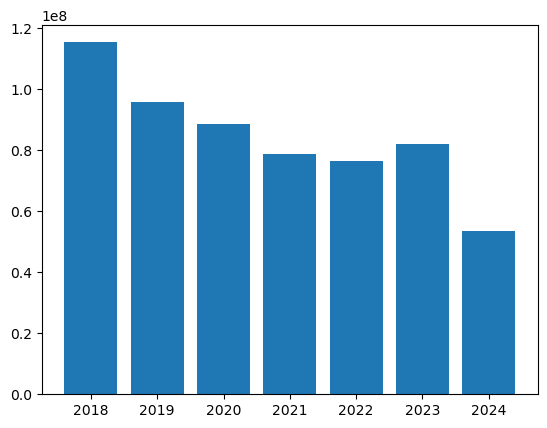

In [38]:
x = df['Support Year']
y = df['Subscriber Count']

plt.bar(x, y)

In [18]:
df.sort_values(by=['Support Month Date Format'])

,Support Month Date Format,Subscriber Count,Disbursement Amount
16,01/01/2017,77348,909286
17,01/01/2018,10302839,101933759
18,01/01/2019,8895621,87875018
19,01/01/2020,6627581,64917699
20,01/01/2021,8424599,81532991
...,...,...,...
282,12/01/2019,6830760,66839360
283,12/01/2020,8246965,79764009
284,12/01/2021,5791827,56410374
285,12/01/2022,6720818,65749092


In [53]:
cl = ll[ll['Support Year']>=2018]
clm = cl.groupby(['Support Year', 'Support Month','Support Month Date Format']).agg({
    'Subscriber Count': 'sum',
    'Disbursement Amount': 'sum'
}).reset_index().sort_values(by=['Support Year', 'Support Month'])

clm

,Support Year,Support Month,Support Month Date Format,Subscriber Count,Disbursement Amount
0,2018,1,01/01/2018,10302839,101933759
1,2018,2,02/01/2018,10188662,100824131
2,2018,3,03/01/2018,10093641,99782352
3,2018,4,04/01/2018,9869968,97690671
4,2018,5,05/01/2018,9717456,96090449
...,...,...,...,...,...
75,2024,4,04/01/2024,7156296,70809830
76,2024,5,05/01/2024,6997333,68859188
77,2024,6,06/01/2024,7032507,69397561
78,2024,7,07/01/2024,6440331,64254009


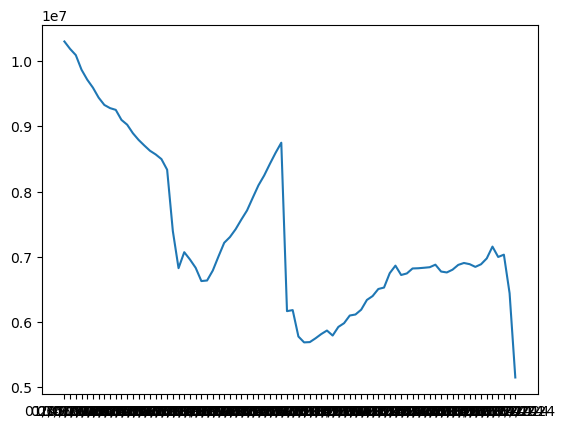

In [54]:
plt.plot(clm['Support Month Date Format'], clm['Subscriber Count'])

In [49]:
pd.to_datetime(clm['Support Month Date Format'])

0    2018-01-01
1    2019-01-01
2    2020-01-01
3    2021-01-01
4    2022-01-01
        ...    
75   2019-12-01
76   2020-12-01
77   2021-12-01
78   2022-12-01
79   2023-12-01
Name: Support Month Date Format, Length: 80, dtype: datetime64[ns]

In [52]:
clm = clm.sort_values(by=['Support Month Date Format'])
clm

,Support Month Date Format,Subscriber Count,Disbursement Amount
0,01/01/2018,10302839,101933759
1,01/01/2019,8895621,87875018
2,01/01/2020,6627581,64917699
3,01/01/2021,8424599,81532991
4,01/01/2022,5924279,57691095
...,...,...,...
75,12/01/2019,6830760,66839360
76,12/01/2020,8246965,79764009
77,12/01/2021,5791827,56410374
78,12/01/2022,6720818,65749092
